In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import argparse, cv2, logging, pdb
import matplotlib.pyplot as plt, numpy as np
import focus_stacking.registration.ecc as ecc
import focus_stacking.utils.images as im_utils
import focus_stacking.utils.data_loader as data_loader
from focus_stacking.utils.pyramids import StackPyramid, Pyramid
import focus_stacking.utils.pyramids
import focus_stacking.energy.energy as energies
import focus_stacking.fusion.fusion as fusion

align_max_iters = 50
align_eps = 1e-3
DATA_ROOT = '/n/fs/3d-indoor/macro_data/focus_stacks'

logger = logging.getLogger(__name__)


In [2]:
aux_out_dir = '/n/fs/3d-indoor/tmp_outdir/aux/'
registered_images = data_loader.load_images_from_dir(aux_out_dir, match='reg_*.jpg')

In [3]:
im = registered_images[0]
gray_im = cv2.cvtColor(im.astype(np.float32), cv2.COLOR_BGR2GRAY) / 255

In [28]:
gray_im

array([[0.64651763, 0.64651763, 0.6465608 , ..., 0.50061965, 0.5045412 ,
        0.5045412 ],
       [0.6543608 , 0.64651763, 0.6465608 , ..., 0.50061965, 0.5045412 ,
        0.50061965],
       [0.6544039 , 0.6465608 , 0.6426392 , ..., 0.50174904, 0.5056706 ,
        0.50174904],
       ...,
       [0.29733726, 0.29733726, 0.2934157 , ..., 0.8357137 , 0.8348196 ,
        0.8348196 ],
       [0.30238822, 0.29062355, 0.2827804 , ..., 0.83684313, 0.8348196 ,
        0.8348196 ],
       [0.29062355, 0.28670198, 0.2945451 , ..., 0.8407647 , 0.8387412 ,
        0.8426628 ]], dtype=float32)

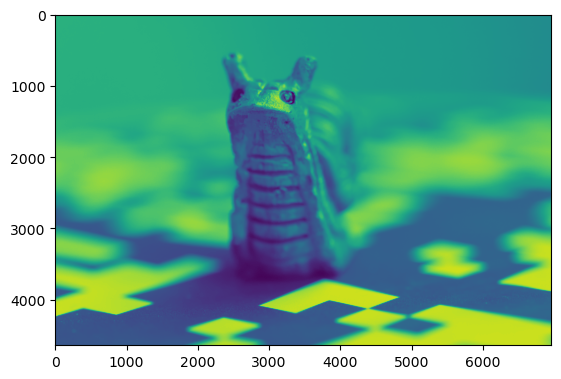

In [5]:
plt.imshow(gray_im)

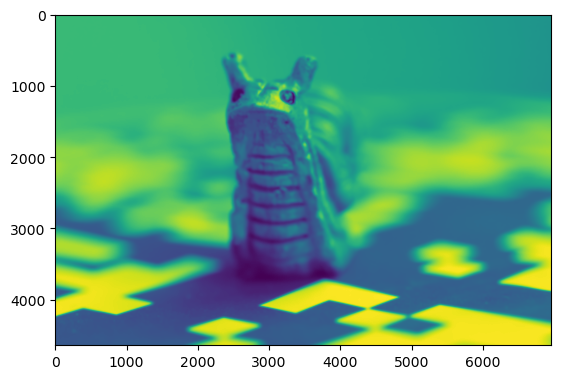

In [7]:
ksize = 33
mean = cv2.blur(gray_im, (ksize, ksize))
plt.imshow(mean)

In [9]:
mean.min(), mean.max()

(0.056807484, 0.9236763)

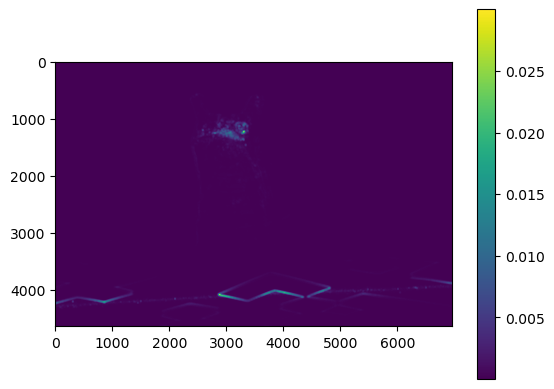

In [23]:
diff = gray_im - mean
sq_diff = diff**2
mean_sq_diff = cv2.blur(sq_diff, (ksize, ksize))
plt.imshow(mean_sq_diff)
plt.colorbar()

In [24]:
mean_sq_diff.min(), mean_sq_diff.max()

(4.7016997e-06, 0.029989803)

In [29]:
mean_diff_sq = np.sqrt(cv2.blur(cv2.blur(gray_im**2, (ksize, ksize)) - mean**2 , (ksize,ksize)))

In [30]:
mean_diff_sq.min(), mean_diff_sq.max()

(0.0023817956, 0.23869123)

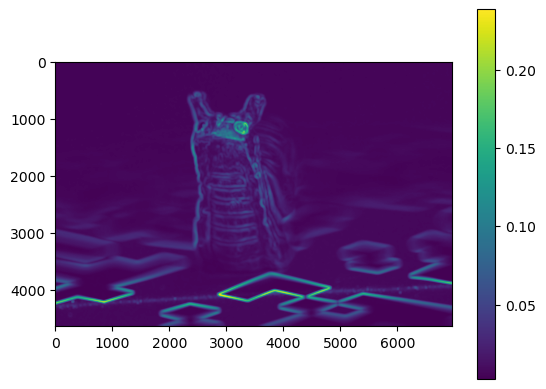

In [31]:
plt.imshow(mean_diff_sq)
plt.colorbar()

In [ ]:
deviation = energies.local_deviation(gray_im, 5)